# Emerging Technologies Assessment 2019

## Christian Olim - G00334621

#### References: 
<li>https://web.microsoftstream.com/video/8e965392-ccc2-4faa-a755-8d86de6a91d6</li>
<li>https://www.youtube.com/watch?v=wQ8BIBpya2k&t=1004s</li>
<li>http://yann.lecun.com/exdb/mnist/</li>
<li>https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb</li>
<li>http://yann.lecun.com/exdb/mnist/</li>
<li>https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d</li>
<li>https://stackoverflow.com/questions/33664651/import-input-data-mnist-tensorflow-not-working</li>
<li>https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/</li>
<li>https://keras.io/getting-started/sequential-model-guide/</li>

In [3]:
# Imports tensorflow, Keras and Numpy
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Checks your version
# tf.__version__

# This will import matplotlib so that we can see the data
import matplotlib.pyplot as plt

# This imports Keras models and layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# This imports the mnist dataset
mnistData = tf.keras.datasets.mnist;

In [4]:
# Here we will load the data set
(x_train, y_train), (x_test, y_test) = mnistData.load_data()

5


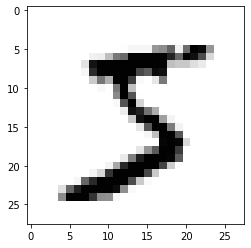

In [6]:
# This will show the first image that comes from the train set
%matplotlib inline
image_index = 0
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

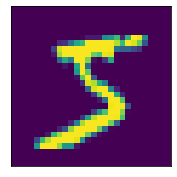

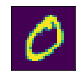

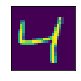

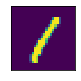

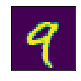

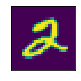

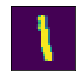

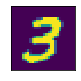

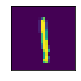

In [10]:
# Here  I will print out the first nine numbers
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])

    plt.show()

## Now We Will Reshape And Normalize The Images

In [11]:
# To use Keras Api, we need to reshaping the array into a 4D array
# Note: There are 60000 images in the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Here we have to make sure that the values are a float so then we can get decimal points after the division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# This will normalize the RGB codes by dividing it to the maximum RGB value
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Now We Will Build A Sequential Model And Then Adding Layers

In [13]:
# The sequential model allows us to create a stack of layers
model = Sequential()

# Here we add a 2D Convolution Layer, this layer will create
# a Convolution Kernel that will help produce a tensor of outputs
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

# Here we add a 2D MaxPooling Layer
# In this case (2, 2) will halve the input in both spatial dimension
model.add(MaxPooling2D(pool_size=(2, 2)))

# This will flatten the 2D arrays for fully connected layers
model.add(Flatten())

# The dense layer will feed out all of the outputs from the previous
# layer to all of the neurons. 128 is the number of neurons.
model.add(Dense(128, activation=tf.nn.relu))

# This droput layer will help prevent the model from overfitting
model.add(Dropout(0.2))

# The dense layer will feed out all of the outputs from the previous
# layer to all of the neurons. 10 is the number of neurons.
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
# Here will be some parameters for the training model\n",
model.compile(optimizer= 'adam', # type of optimizer, you can use others
                loss = 'sparse_categorical_crossentropy', # Degree of error
                 metrics = ['accuracy']) # The metrics we want to track as we go

# This will train the model
model.fit(x_train, y_train, epochs = 8)

# We got a 99.25% accuracy after eight epochs
# After each epoch you can see a small increase from as it is learning

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 43s 709us/sample - loss: 0.2143 - accuracy: 0.9351
Epoch 2/8
60000/60000 [==============================] - 25s 419us/sample - loss: 0.0871 - accuracy: 0.9733
Epoch 3/8
60000/60000 [==============================] - 28s 471us/sample - loss: 0.0608 - accuracy: 0.9812
Epoch 4/8
60000/60000 [==============================] - 27s 443us/sample - loss: 0.0469 - accuracy: 0.9851
Epoch 5/8
60000/60000 [==============================] - 28s 459us/sample - loss: 0.0370 - accuracy: 0.9882
Epoch 6/8
60000/60000 [==============================] - 27s 447us/sample - loss: 0.0306 - accuracy: 0.9897
Epoch 7/8
60000/60000 [==============================] - 27s 453us/sample - loss: 0.0258 - accuracy: 0.9916
Epoch 8/8
60000/60000 [==============================] - 28s 462us/sample - loss: 0.0225 - accuracy: 0.9925


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

# The loss is just under 3% and the accuracy is 98%

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
# To save the model to json format
model.save('model.h5')